<a href="https://colab.research.google.com/github/ticklecatisback/My-colab-Collections/blob/main/Pyxelate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super Pyxelate Generator

Super Pyxelate converts images to 8-bit pixel art.

* Github: https://github.com/sedthh/pyxelate
* Original notebook: https://colab.research.google.com/github/sedthh/pyxelate/blob/master/examples.ipynb#scrollTo=FdDtSCDhBdf6

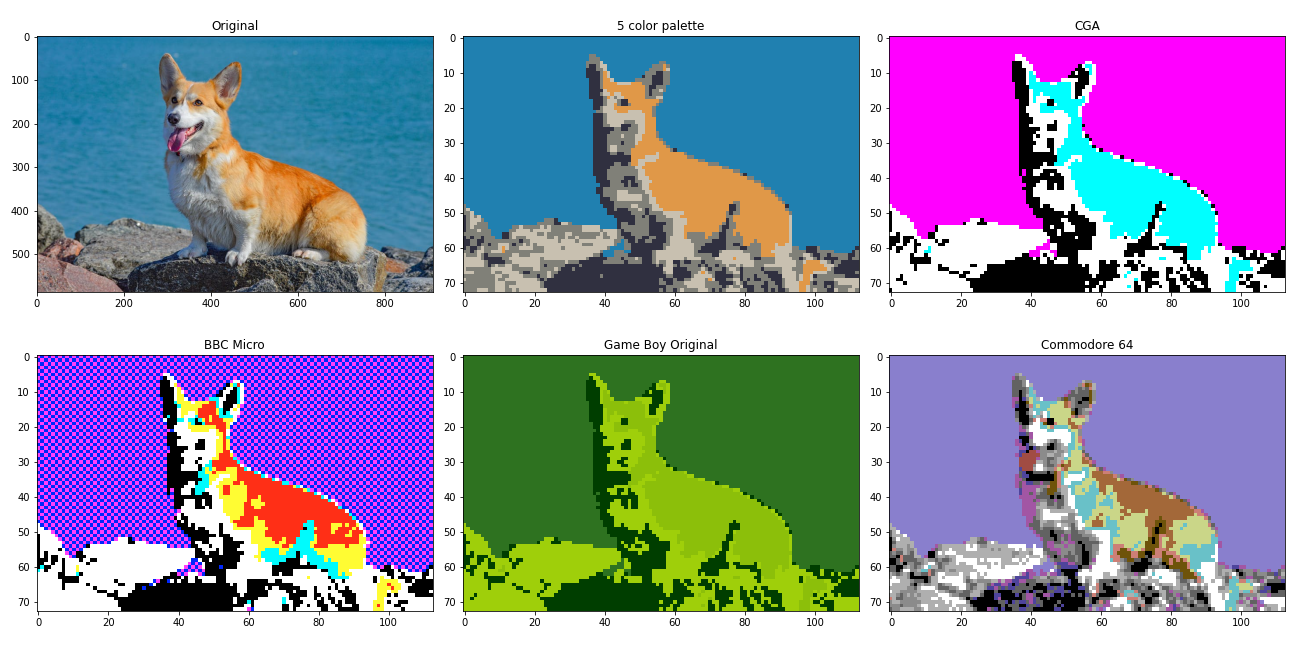

In [1]:
#@title STEP1: Setup
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/sudo-ken/FFmpeg-for-GDrive/master/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")
 
from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')

!git clone https://github.com/sedthh/pyxelate.git
%cd pyxelate
!pip install -r requirements.txt

from os import path
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

from pyxelate import Pyx, Pal

# Display images in Jupyter Notebook

def plot(subplots=[], save_as=None, fig_h=9):
    """Plotting helper function"""
    fig, ax = plt.subplots(int(np.ceil(len(subplots) / 3)), 
                           min(3, len(subplots)), 
                           figsize=(18, fig_h))
    if len(subplots) == 1:
        ax = [ax]
    else:
        ax = ax.ravel()
    for i, subplot in enumerate(subplots):
        if isinstance(subplot, dict):
            ax[i].set_title(subplot["title"])
            ax[i].imshow(subplot["image"])
        else:
            ax[i].imshow(subplot)
    fig.tight_layout()
    if save_as is not None and SAVE_IMAGES:
        # Save image as an example in README.md
        plt.savefig(path.join("examples/", save_as), transparent=True)
    plt.show()

clear_output()
print('DONE')

DONE


In [2]:
#@title STEP2: Select a Image
image_url = 'https://media.bizj.us/view/img/11965652/glennfukuda-4196c-pr*1500xx1819-2425-61-0.jpg' #@param {type:"string"}
import shutil
import cv2
from IPython.display import Image

if image_url:
  !wget "$image_url" -O /content/pyxelate/examples/image.png

Image('/content/pyxelate/examples/image.png')
print('DONE')

--2022-12-15 05:40:59--  https://media.bizj.us/view/img/11965652/glennfukuda-4196c-pr*1500xx1819-2425-61-0.jpg
Resolving media.bizj.us (media.bizj.us)... 13.249.85.93, 13.249.85.118, 13.249.85.46, ...
Connecting to media.bizj.us (media.bizj.us)|13.249.85.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 354485 (346K) [image/jpeg]
Saving to: ‘/content/sample_data/image.png’

/content/sample_dat 100%[===================>] 346.18K  --.-KB/s    in 0.07s   

2022-12-15 05:41:00 (4.95 MB/s) - ‘/content/sample_data/image.png’ saved [354485/354485]

DONE


In [ ]:
#@title STEP2+: Upload your Image
import os
from google.colab import files
import cv2
from IPython.display import Image
uploaded = files.upload()
dst ='/content/pyxelate/examples/image.png' 
os.rename(list(uploaded.keys())[0], dst)

Image('/content/pyxelate/examples/image.png')
print('DONE')

In [4]:
#@title STEP3: Generate the image into Pixels
SAVE_IMAGES = False #@param {type:"boolean"}
# load image with 'skimage.io.imread()'
image = io.imread("examples/image.png")  

downsample_by = 14  # new image will be 1/14th of the original in size
palette = 7  # find 7 colors

# 1) Instantiate Pyx transformer
pyx = Pyx(factor=downsample_by, palette=palette)

# 2) fit an image, allow Pyxelate to learn the color palette
pyx.fit(image)

# 3) transform image to pixel art using the learned color palette
new_image = pyx.transform(image)

# save new image with 'skimage.io.imsave()'
#io.imsave("examples/test.png", new_image)
plot([image, new_image], "p_image.png")

FileNotFoundError: ignored

In [ ]:
#@title STEP4: Download image <b><font color="red" size="+1">NOTE: make sure to save the image or it will not work</font></b>
files.download('/content/pyxelate/examples/p_image.png')

In [ ]:
#@title You might get better results by running this cell, but sometimes not
# fit() and transform() on image with alpha channel
SAVE_IMAGES = False #@param {type:"boolean"}
image = io.imread("/content/pyxelate/examples/image.png")
p_image = Pyx(factor=9, palette=4, dither="naive", alpha=.6).fit_transform(image)

plot([{"title":"Converting PNG with alpha channel", "image":image},
      {"title":"Pixels are either opaque/transparent above/below alpha threshold", "image":p_image}],
    "p_image.png")

In [ ]:
#@title STEP3+: Pixel transform the image
SAVE_IMAGES = False #@param {type:"boolean"}
car = io.imread("/content/pyxelate/examples/image.png")
robocop = io.imread("/content/pyxelate/examples/p_image.png")

# fit a model on each
pyx_car = Pyx(factor=5, palette=8, dither="none").fit(car)
pyx_robocop = Pyx(factor=6, palette=7, dither="naive", svd=True).fit(robocop)

plot([{"title":"fit(car)", "image":car},
      {"title":"transform(car)", "image":pyx_car.transform(car)},
      {"title":"transform(robocop)", "image":pyx_car.transform(robocop)},
      {"title":"fit(robocop)", "image":robocop},
      {"title":"transform(car)", "image":pyx_robocop.transform(car)},
      {"title":"transform(robocop)", "image":pyx_robocop.transform(robocop)},
     ], "p_fit_transform.png", fig_h=18)

In [ ]:
#@title STEP4+: Download image <b><font color="red" size="+1">NOTE: make sure to save the image or it will not work</font></b>
files.download('/content/pyxelate/examples/p_fit_transform.png')

/content/pyxelate/pyxelate/pyx.py:84: Warning: Pyxelate could not properly assign colors, try a different palette size for better results!
  warnings.warn("Pyxelate could not properly assign colors, try a different palette size for better results!", Warning)
/content/pyxelate/pyxelate/pyx.py:203: Warning: Some colors are redundant, try a different palette size for better results!
  warnings.warn("Some colors are redundant, try a different palette size for better results!", Warning)


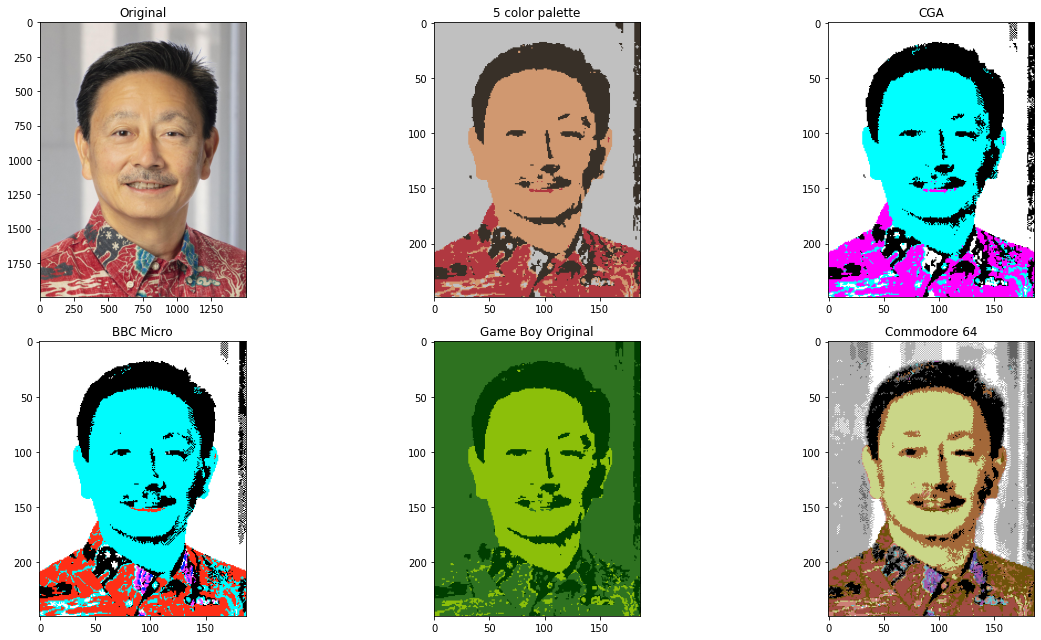

In [5]:
#@title STEP3++: Better pixel transform the image
SAVE_IMAGES = True #@param {type:"boolean"}

# original image
image = io.imread("/content/pyxelate/examples/image.png")
# find 5 colors automatically
image_5 = Pyx(factor=8, palette=5, dither="none", svd=True).fit_transform(image)
# assign CGA palette
image_cga = Pyx(factor=8, palette=Pal.CGA_MODE4_PAL1, dither="naive", svd=True).fit_transform(image)

# assign BBC Micro palette
image_bbc = Pyx(factor=8, palette=Pal.ZX_SPECTRUM, dither="naive", svd=False).fit_transform(image)
# assign Game Boy palette
image_gb = Pyx(factor=8, palette=Pal.GAMEBOY_ORIGINAL, dither="none", svd=True).fit_transform(image)
# assign C64 palette
image_c64 = Pyx(factor=8, palette=Pal.COMMODORE_64, dither="naive", svd=True).fit_transform(image)

plot([{"title": "Original", "image": image},
      {"title": "5 color palette", "image": image_5},
      {"title": "CGA", "image": image_cga},
      {"title": "BBC Micro", "image": image_bbc},
      {"title": "Game Boy Original", "image": image_gb},
      {"title": "Commodore 64", "image": image_c64}],
      "p2_image.png")

In [ ]:
#@title STEP4++: Download image <b><font color="red" size="+1">NOTE: make sure to save the image or it will not work</font></b>
files.download('/content/pyxelate/examples/p2_image.png')